In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") 

In [3]:
file_path = "/home/abhi/Desktop/DataScience/unemploy.csv"  # Change path if needed
df = pd.read_csv(file_path)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.columns = df.columns.str.strip()

In [5]:
#  3. Rename columns for easier usage
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'UnemploymentRate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'LabourParticipationRate'
}, inplace=True)


In [6]:
#  4. Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#  5. Drop rows with missing important values
df = df.dropna(subset=['Date', 'UnemploymentRate'])

In [7]:
print("Data Loaded:", df.shape)
print(df.head())

Data Loaded: (267, 9)
           Region       Date Frequency  UnemploymentRate  Employed  \
0  Andhra Pradesh 2020-01-31         M              5.48  16635535   
1  Andhra Pradesh 2020-02-29         M              5.83  16545652   
2  Andhra Pradesh 2020-03-31         M              5.79  15881197   
3  Andhra Pradesh 2020-04-30         M             20.51  11336911   
4  Andhra Pradesh 2020-05-31         M             17.43  12988845   

   LabourParticipationRate Region.1  longitude  latitude  
0                    41.02    South    15.9129     79.74  
1                    40.90    South    15.9129     79.74  
2                    39.18    South    15.9129     79.74  
3                    33.10    South    15.9129     79.74  
4                    36.46    South    15.9129     79.74  


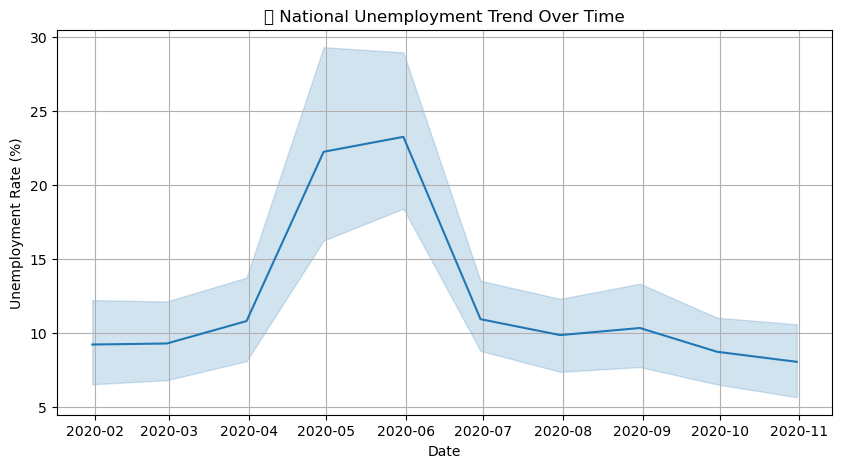

In [12]:
# ---------- NATIONAL TREND ----------
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Date", y="UnemploymentRate")
plt.title("📈 National Unemployment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


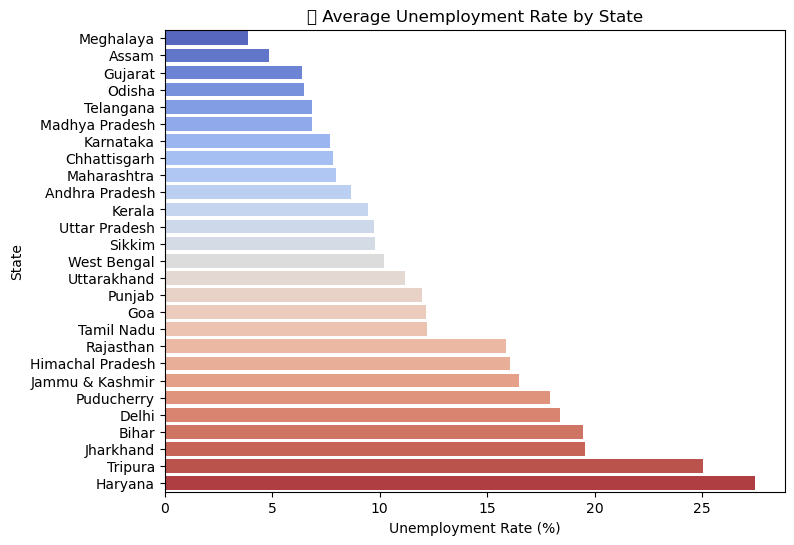

In [11]:
# ----------  STATE-WISE AVERAGE ----------
state_avg = df.groupby("Region")["UnemploymentRate"].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title("📊 Average Unemployment Rate by State")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.show()


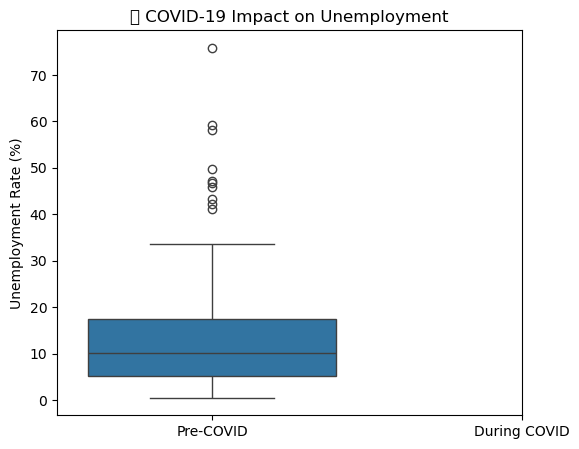

Pre-COVID Mean: 9.23
During-COVID Mean: 12.96


In [10]:
# ---------- COVID-19 IMPACT ----------
# Define pre and during COVID periods
pre_covid = df[df["Date"] < "2020-03-01"]["UnemploymentRate"]
during_covid = df[df["Date"] >= "2020-03-01"]["UnemploymentRate"]

plt.figure(figsize=(6, 5))
sns.boxplot(data=[pre_covid, during_covid])
plt.xticks([0, 1], ["Pre-COVID", "During COVID"])
plt.title("🦠 COVID-19 Impact on Unemployment")
plt.ylabel("Unemployment Rate (%)")
plt.show()

print(f"Pre-COVID Mean: {pre_covid.mean():.2f}")
print(f"During-COVID Mean: {during_covid.mean():.2f}")
